Problem 1

In [10]:
import sympy as sy

x = sy.symbols('x')
f_prime = sy.diff((sy.sin(x) + 1) ** (sy.sin(sy.cos(x))), x)
f_prime

(-log(sin(x) + 1)*sin(x)*cos(cos(x)) + sin(cos(x))*cos(x)/(sin(x) + 1))*(sin(x) + 1)**sin(cos(x))

In [11]:
fprime = sy.lambdify(x, f_prime)
fprime

<function _lambdifygenerated(x)>

In [12]:
from matplotlib import pyplot as plt
import numpy as np
from math import pi
ax = plt.gca()
ax.spines["bottom"].set_position("zero")
points = np.linspace(-pi, pi, 1000)
plt.plot(points, fprime(points))

Problem 2

In [13]:
def Forward1(f, h):
    def slope(x, h):
        return (f(x+h)-f(x))/h
    return slope

def Forward2(f, h):
    def slope(x, h):
        return (-3 * f(x) + 4 * f(x + h) - f(x + 2 * h))/(2 * h)
    return slope

def Backward1(f, h):
    def slope(x, h):
        return (f(x)-f(x-h))/h
    return slope

def Backward2(f, h):
    def slope(x, h):
        return (3 * f(x) - 4 * f(x - h) + f(x - 2 * h))/(2 * h)
    return slope

def Centered1(f, h):
    def slope(x, h):
        return (f(x+h)-f(x-h))/(2*h)
    return slope

def Centered2(f, h):
    def slope(x, h):
        return (f(x - 2 * h) -8*f(x-h)+8*f(x+h)-f(x+2*h))/(12 * h)
    return slope

In [14]:
def fx(x):
    return (np.sin(x) + 1) ** (np.sin(np.cos(x)))
fx_F1 = Forward1(fx, 0.001)
fx_F2 = Forward2(fx, 0.001)
fx_B1 = Backward1(fx, 0.001)
fx_B2 = Backward2(fx, 0.001)
fx_C1 = Centered1(fx, 0.001)
fx_C2 = Centered2(fx, 0.001)

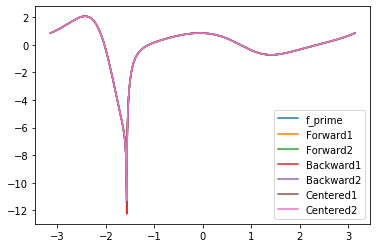

In [15]:
points = np.linspace(-pi, pi, 1000)
plt.plot(points, fprime(points), label = "f_prime")
plt.plot(points, fx_F1(points, 0.001), label = "Forward1")
plt.plot(points, fx_F2(points, 0.001), label = "Forward2")
plt.plot(points, fx_B1(points, 0.001), label = "Backward1")
plt.plot(points, fx_B2(points, 0.001), label = "Backward2")
plt.plot(points, fx_C1(points, 0.001), label = "Centered1")
plt.plot(points, fx_C2(points, 0.001), label = "Centered2")
plt.legend(loc = "lower right")
plt.show()

We can see from the graphs that those results are very similar.

Problem 3

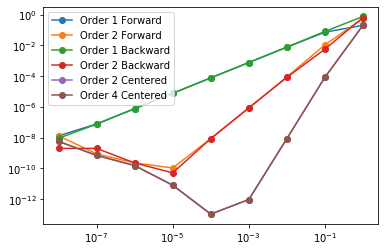

In [16]:
def error(func, x, h):
    return np.absolute(fprime(x) - func(x, h))
h = np.logspace(-8, 0, 9)
x0 = 1
plt.loglog(h, error(fx_F1, x0, h), marker = "o", label = "Order 1 Forward")
plt.loglog(h, error(fx_F2, x0, h), marker = "o", label = "Order 2 Forward")
plt.loglog(h, error(fx_B1, x0, h), marker = "o", label = "Order 1 Backward")
plt.loglog(h, error(fx_B2, x0, h), marker = "o", label = "Order 2 Backward")
plt.loglog(h, error(fx_C2, x0, h), marker = "o", label = "Order 2 Centered")
plt.loglog(h, error(fx_C2, x0, h), marker = "o", label = "Order 4 Centered")
plt.legend(loc = "upper left")

Problem 4

In [17]:
data = np.load("plane.npy")
data

array([[ 7.  , 56.25, 67.54],
       [ 8.  , 55.53, 66.57],
       [ 9.  , 54.8 , 65.59],
       [10.  , 54.06, 64.59],
       [11.  , 53.34, 63.62],
       [12.  , 52.69, 62.74],
       [13.  , 51.94, 61.72],
       [14.  , 51.28, 60.82]])

In [18]:
alpha = np.deg2rad(data[:, 1])
beta = np.deg2rad(data[:, 2])
x = 500 * np.tan(beta) / (np.tan(beta) - np.tan(alpha))
y = 500 * np.tan(beta) * np.tan(alpha) / (np.tan(beta) - np.tan(alpha))
x

array([1311.2713366 , 1355.9364762 , 1401.91839832, 1450.49700629,
       1498.64035029, 1543.79895461, 1598.04138183, 1647.59609291])

In [19]:
x_t = lambda t: x[t-7]
x_F1 = Forward1(x_t, 1)
x_B1 = Backward1(x_t, 1)
x_C1 = Centered1(x_t, 1)

y_t = lambda t: y[t-7]
y_F1 = Forward1(y_t, 1)
y_B1 = Backward1(y_t, 1)
y_C1 = Centered1(y_t, 1)

In [20]:
list_speed = []
speed_7 = np.sqrt((x_F1(7, 1) ** 2) + (y_F1(7, 1) ** 2))
list_speed.append(speed_7)

In [21]:
for i in range(8, 14):
    speed = np.sqrt((x_C1(i, 1) ** 2) + (y_C1(i, 1) ** 2))
    list_speed.append(speed)

In [22]:
speed_14 = np.sqrt((x_B1(14, 1) ** 2) + (y_B1(14, 1) ** 2))
list_speed.append(speed_14)

In [23]:
i = 7
while i <= 14:
    print("The speed is", list_speed[i-7], "at time", i)
    i = i + 1

The speed is 46.42420062213374 at time 7
The speed is 47.001039380953344 at time 8
The speed is 48.99880514036797 at time 9
The speed is 50.09944162965227 at time 10
The speed is 48.290350838204944 at time 11
The speed is 51.564559049272255 at time 12
The speed is 53.923033545053535 at time 13
The speed is 51.51480056963696 at time 14


Problem 5

In [67]:
import numpy as np
import sympy as sy

def Jacobian(f, x0, h):
    m = len(f)
    n = len(x0)
    J = np.zeros((n, m))
    I = np.identity(n)
    variable = set()
    for func in f:
        variable = variable.union(func.atoms(sy.Symbol))
    variable = list(variable)
    for i, func in enumerate(f):
        for j, x in enumerate(variable):
            fx = sy.lambdify(variable, f[i])
            z1 = tuple(x0 + h * I[j, :])
            z2 = tuple(x0 - h * I[j, :])
            f_x = (fx(*z1) - fx(*z2)) / (2*h)
            J[i, j] = f_x            
    return J

x = sy.Symbol('x')
y = sy.Symbol('y')
f1=x**2 
f2=x**3-y
f=[f1, f2]
Jacobian(f, [1,1], 0.01)

array([[ 0.    ,  2.    ],
       [-1.    ,  3.0001]])

Problem 7

In [69]:
from autograd import numpy as np
from autograd import grad
import time
from math import pi
import sympy as sy

def fx(x):
    return (np.sin(x) + 1) ** (np.sin(np.cos(x)))

def Time(N):
    T0 = []
    T1 = []
    T2 = []
    error_C4 = []
    error_grad = []
    for i in range(N):
        x0=np.random.uniform(-pi, pi)
        t0=time.process_time()
        x = sy.symbols('x')
        f_prime = sy.diff((sy.sin(x) + 1) ** (sy.sin(sy.cos(x))), x)
        fprime = sy.lambdify(x, f_prime)
        y0 = fprime(x0)
        t1=time.process_time()
        T0.append(t1 - t0)
        t2 = time.process_time()
        C2=Centered2(fx, 0.0001)
        y1 = C2(x0, 0.0001)
        t3=time.process_time()
        T1.append(t3-t2)
        error_C4.append(abs(y1 - y0))
        t3=time.process_time()
        grad_fx=grad(fx)
        y2 = grad_fx(x0)
        t4=time.process_time()
        T2.append(t4-t3)
        error_grad.append(abs(y2-y0))
    plt.scatter(np.array(T0),np.array([1e-18] * N), label="Sympy")
    plt.scatter(np.array(T1),np.array(error_C4), label="Difference Quotients")
    plt.scatter(np.array(T2),np.array(error_grad), label="Autograd")
    plt.legend(loc='upper right')
    plt.xlim(10**-5, 1)
    plt.ylim(10**-19, 10**-10)
    plt.loglog()

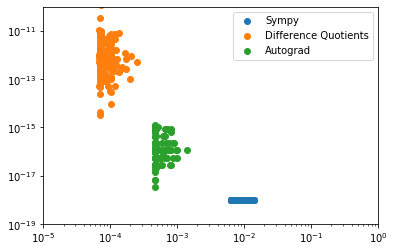

In [70]:
Time(200)